# Measuring Inequality

## Rebekah Dix and Cristian Dagnino

### University of Wisconsin-Madison and University of Chicago

Inequality measures all strive to describe the income/wealth distribution of a population. This description is inherently a simplification, since it's generally not possible to condense the information contained in a whole distribution into just a few numbers.

Inequality measures are, thus, always a simplification, but they can be very useful. In this notebook, we'll talk about the Lorenz Curve [wiki] and Gini index and consider a few examples. (*Note:* we'll mention both income and wealth inequality in this notebook. They're, of course, different, but for illustrative purposes we don't need to keep a clear distintion).

### Lorenz Curve

The Lorenz Curve was developed to graphically represent inequality of a wealth distribution. The image below (taken from wikipedia) shows two Lorenz curves. Both the x and y-axis go from 0 to 100%. An $x=40%$, $y=20%$ point means that the poorest 40% of the population have 20% of wealth/income. The 50 degree line indicates perfect equality: the poorest 40% have 40% of income, the poorest 90% have 90% of income and so on. Thus, the farther away that the Lorenz Curve is from that 50 degree line, the more unequal the society.

![lorenz](https://upload.wikimedia.org/wikipedia/commons/5/59/Economics_Gini_coefficient2.svg)

#### Formula

For a population of size $n$, we order the income of each person $i$ $y_i$ so that the sequence $y_i$ are indexed in a non-decreasing order $( y_i ≤ y_{i+1})$. Then the Lorenz curve is the continuous piecewise linear function connecting the points $(F_i, L_i)$, where:

$$ F_i = i/n $$

$$ S_i = \Sigma_{j=1}^i \; y_j\, $$

$$ L_i = S_i / S_n $$

In words, $L_i$ is the accumulated wealth/income up until person $i$

### Gini Coefficient

The Gini coefficient aims to summarize the inequality of a country in a single number. It goes from 0 to 1, where 0 corresponds to perfect equality and 1 maximal inequality.

The easiest way to understand how the Gini is calculated is through the Lorenz Curve. If you look at the image above, there are two areas: A and B. The B area is the area under a curve of the Lorenz curve of a country, while A + B is the area under the curve of the Lorenz curve of perfect equality. The Gini is defined as

$$ G = \frac{A}{A+B}$$

Thus, if the B curve is very similar to A, the Gini coefficient will be zero (perfect equality). If the B area tends to zero, then the Gini coefficient will approach one (perfect inequality).


QuantEcon.py includes implementations of functions to compute the Lorenz Curve and Gini Coefficient. We will demonstrate this code using data from the Bank of Italy, Survey on Household Income and Wealth 2016 (see https://www.bancaditalia.it/statistiche/tematiche/indagini-famiglie-imprese/bilanci-famiglie/documentazione/index.html for more information).

In [3]:
wealth = pd.read_csv('ricfam16.csv', usecols=['nquest', 'W'])

### Extreme Cases

### Country/Synthetic data

In [13]:
# import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from quantecon.inequality import lorenz_curve, gini_coefficient

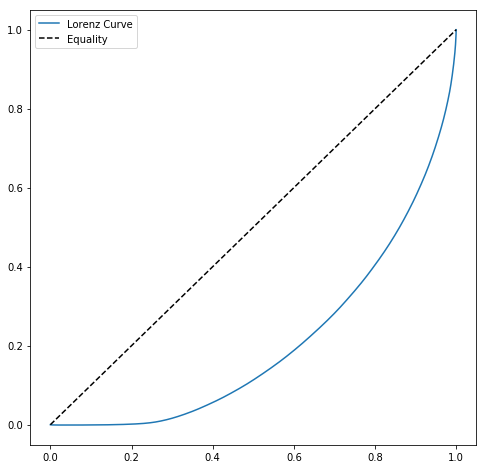

In [12]:
cum_people, cum_income = lorenz_curve(wealth.W.values)
plt.figure(figsize=(8, 8))
plt.plot(cum_people, cum_income, label='Lorenz Curve')
plt.plot(cum_people, cum_people, 'k--', label='Equality')
plt.legend()
plt.show()

In [7]:
n = 3000

# Almost Equal distribution
y = np.repeat(1, n) + np.random.normal(scale=0.0001, size=n)
cum_people, cum_income = lorenz_curve(y)

In [8]:
cum_people

array([0.00000000e+00, 3.33333333e-04, 6.66666667e-04, ...,
       9.99333333e-01, 9.99666667e-01, 1.00000000e+00])

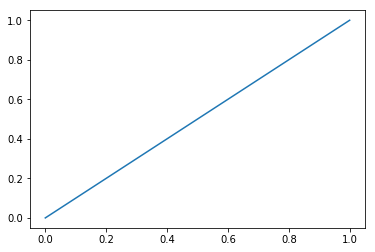

In [10]:
plt.plot(cum_people, cum_income)
plt.show()

In [11]:
# Very uneven distribution
y = np.repeat(0.001, n)
y[4] = 100000
pop_cum, income_cum = lorenz_curve(y)

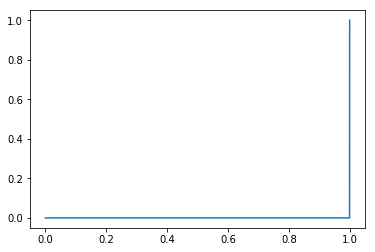

In [12]:
plt.plot(pop_cum, income_cum)
plt.show()

In [13]:
n = 10000

# Tests Pareto: G = 1 / (2*a - 1)
a = np.random.randint(2, 15)
expected = 1 / (2 * a - 1)

y = (np.random.pareto(a, size=n) + 1) * 2
coeff = gini_coefficient(y)

In [14]:
# Tests Weibull: G = 1 - 2**(-1/a)
a = np.random.randint(2, 15)
expected = 1 - 2 ** (-1 / a)

y = np.random.weibull(a, size=n)
coeff = gini_coefficient(y)